In [149]:
pip install streamlit

  Using cached Pympler-1.0.1-py3-none-any.whl (164 kB)
  Using cached semver-3.0.0-py3-none-any.whl (17 kB)
  Using cached GitPython-3.1.31-py3-none-any.whl (184 kB)
  Using cached altair-4.2.2-py3-none-any.whl (813 kB)
  Using cached tzlocal-4.3-py3-none-any.whl (20 kB)
  Using cached blinker-1.6.1-py3-none-any.whl (13 kB)
  Using cached validators-0.20.0.tar.gz (30 kB)
  Using cached rich-13.3.3-py3-none-any.whl (238 kB)
  Using cached pydeck-0.8.0-py2.py3-none-any.whl (4.7 MB)
  Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
  Using cached gitdb-4.0.10-py3-none-any.whl (62 kB)
  Using cached smmap-5.0.0-py3-none-any.whl (24 kB)
  Using cached Pygments-2.14.0-py3-none-any.whl (1.1 MB)
  Using cached markdown_it_py-2.2.0-py3-none-any.whl (84 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl (10.0 kB)
  Using cached pytz_deprecation_shim-0.1.0.post0-py2.py3-none-any.whl (15 kB)
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19583 sha256=8d

ERROR: Could not install packages due to an OSError: [WinError 5] Отказано в доступе: 'C:\\Users\\dany2\\anaconda3\\Lib\\site-packages\\google\\~upb\\_message.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [2]:
pip install tensorflow

  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached flatbuffers-23.3.3-py2.py3-none-any.whl (26 kB)
  Using cached tensorboard-2.12.1-py3-none-any.whl (5.6 MB)
  Using cached termcolor-2.2.0-py3-none-any.whl (6.6 kB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorflow_estimator-2.12.0-py2.py3-none-any.whl (440 kB)
  Using cached libclang-16.0.0-py2.py3-none-win_amd64.whl (24.4 MB)
  Using cached jax-0.4.8.tar.gz (1.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished wit

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.22.4 which is incompatible.


In [5]:
pip install imgaug

  Using cached imgaug-0.4.0-py2.py3-none-any.whl (948 kB)
Note: you may need to restart the kernel to use updated packages.


In [217]:
import tensorflow as tf
import os
import pandas as pd
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D
from tensorflow.python.keras.layers import Activation, Dropout, Flatten, Dense
import numpy as np # linear algebra
import pandas as pd 
import numpy as np 
import random
import pandas as pd 
from PIL import Image 
import matplotlib.pyplot as plt
import cv2
import imgaug.augmenters as ia
from imgaug import augmenters, imgaug
from PIL import Image, ImageEnhance , ImageFilter
from skimage import exposure
from skimage.util import random_noise
import warnings
from tensorflow import keras
warnings.filterwarnings('ignore')

In [190]:
train_dir = 'D:/chemp/Chempionat/Input'
test_dir = 'D:/chemp/Chempionat/InputTest'
#val_dir = '/kaggle/input/fruit-and-vegetable-image-recognition/validation'
classes = os.listdir('D:/chemp/Chempionat/Input')

In [191]:
classes

['Cracks', 'Groove']

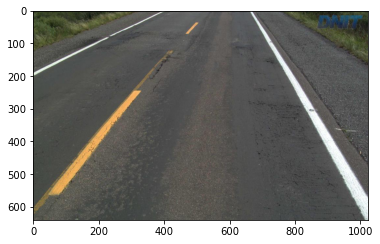

In [192]:
image = tf.keras.preprocessing.image.load_img(train_dir + '/Cracks/' +'Crack_300.jpg')
imgPlot = plt.imshow(image)
plt.show()

In [193]:
batch_size = 32
image_size = 190

train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 validation_split=0.2,
                                                                 subset="training",
                                                                 seed=123,
                                                                 image_size=(image_size, image_size),
                                                                 batch_size=batch_size)

val_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                               validation_split=0.2,
                                                               subset="training",
                                                               seed=123,
                                                               image_size=(image_size, image_size),
                                                               batch_size=batch_size)

Found 4095 files belonging to 2 classes.
Using 3276 files for training.
Found 437 files belonging to 2 classes.
Using 350 files for training.


In [203]:
# Размеры изображения
img_width, img_height = 190, 190
# Размерность тензора на основе изображения для входных данных в нейронную сеть
# backend Tensorflow, channels_last
input_shape = (img_width, img_height, 3)

# Количество эпох

epochs = 10

#epochs = len(train_data)//batch_size

In [204]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [205]:
# Компилируем нейронную сеть
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [206]:
# Обучаем модель с использованием генераторов
#train_generator - генератор данных для обучения
#validation_data - генератор данных для проверки
model.fit_generator(
    train_data,
    epochs=epochs,
    validation_data=val_data, validation_steps=3)#30

Epoch 1/10
103/103 [==============================] - 85s 792ms/step - loss: 6.0677 - accuracy: 0.6719 - val_loss: 0.4186 - val_accuracy: 0.8854
Epoch 2/10
103/103 [==============================] - 71s 667ms/step - loss: 0.4866 - accuracy: 0.7985 - val_loss: 0.2159 - val_accuracy: 0.9167
Epoch 3/10
103/103 [==============================] - 69s 654ms/step - loss: 0.4852 - accuracy: 0.7885 - val_loss: 0.3608 - val_accuracy: 0.9479
Epoch 4/10
103/103 [==============================] - 69s 653ms/step - loss: 0.4221 - accuracy: 0.8376 - val_loss: 0.4962 - val_accuracy: 0.7708
Epoch 5/10
103/103 [==============================] - 70s 658ms/step - loss: 0.3797 - accuracy: 0.8394 - val_loss: 0.3230 - val_accuracy: 0.9271
Epoch 6/10
103/103 [==============================] - 71s 668ms/step - loss: 0.3265 - accuracy: 0.8678 - val_loss: 0.4524 - val_accuracy: 0.9375
Epoch 7/10
103/103 [==============================] - 72s 677ms/step - loss: 0.3500 - accuracy: 0.8565 - val_loss: 0.2191 - val_ac

In [208]:
#Оцениваем качество работы сети с помощью генератора
scores = model.evaluate_generator(val_data, 3)
print("Точность на тестовых данных: %.2f%%" % (scores[1]*100))

Точность на тестовых данных: 97.92%


In [220]:
model.save('D:\chemp\Chempionat\goroga3.h5')

NotImplementedError: 
Layer ModuleWrapper was created by passing
non-serializable argument values in `__init__()`,
and therefore the layer must override `get_config()` in
order to be serializable. Please implement `get_config()`.

Example:

class CustomLayer(keras.layers.Layer):
    def __init__(self, arg1, arg2, **kwargs):
        super().__init__(**kwargs)
        self.arg1 = arg1
        self.arg2 = arg2

    def get_config(self):
        config = super().get_config()
        config.update({
            "arg1": self.arg1,
            "arg2": self.arg2,
        })
        return config

In [215]:
tf.keras.saving.load_model(
    "goroga2.h5", custom_objects=None, compile=True, safe_mode=True
)

ValueError: No model config found in the file at <tensorflow.python.platform.gfile.GFile object at 0x000001831A5E0700>.

In [212]:
model.save('goroga2.h5')

NotImplementedError: 
Layer ModuleWrapper was created by passing
non-serializable argument values in `__init__()`,
and therefore the layer must override `get_config()` in
order to be serializable. Please implement `get_config()`.

Example:

class CustomLayer(keras.layers.Layer):
    def __init__(self, arg1, arg2, **kwargs):
        super().__init__(**kwargs)
        self.arg1 = arg1
        self.arg2 = arg2

    def get_config(self):
        config = super().get_config()
        config.update({
            "arg1": self.arg1,
            "arg2": self.arg2,
        })
        return config